# Host range expansion and genetic plasticity drive the trade-off between integrative and extrachromosomal mobile genetic elements

The goal here, is to provide the code necessary to reproduce the figures and stats used in the corresponding article.

# Import and defition

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from scipy.stats import binom_test
%matplotlib inline
sns.set_style("ticks")

In [2]:
%load_ext watermark

In [3]:
%watermark -a "Jean Cury" -d -v -p pandas,numpy,matplotlib,seaborn,scipy -m

Jean Cury 2018-01-17 

CPython 2.7.6
IPython 5.1.0

pandas 0.19.2
numpy 1.12.1
matplotlib 1.5.1
seaborn 0.7.0
scipy 0.14.0

compiler   : GCC 4.2.1 (Apple Inc. build 5666) (dot 3)
system     : Darwin
release    : 15.5.0
machine    : x86_64
processor  : i386
CPU cores  : 24
interpreter: 64bit


In [4]:
df_conj = pd.read_table("Tables/Table_2_Table_count_BIG_TABLE_typeT_1116B_ok_community_repeats.txt", index_col=0)

In [5]:
df_conj.head()

ATB_res  CELLULAR PROCESSES AND SIGNALING  \
ICE_ID                                                                    
BUAM001.B.00001.P004_typeT_1      1.0                              42.0   
BUAM001.B.00002.P004_typeT_1      0.0                              18.0   
BUAM001.B.00003.P004_typeT_1      0.0                              18.0   
BUCE001.B.00003.C001_typeT_1      0.0                              13.0   
BUCE001.B.00006.C001_typeT_1      0.0                              15.0   

                              DDE_Transposase  Eex  \
ICE_ID                                               
BUAM001.B.00001.P004_typeT_1              6.0  0.0   
BUAM001.B.00002.P004_typeT_1              0.0  0.0   
BUAM001.B.00003.P004_typeT_1              0.0  0.0   
BUCE001.B.00003.C001_typeT_1              2.0  1.0   
BUCE001.B.00006.C001_typeT_1              0.0  0.0   

                              INFORMATION STORAGE AND PROCESSING  Integrase  \
ICE_ID                                                                        
BUAM001.B.00001.P004_typeT_1                                35.0        6.0   
BUAM001.B.00002.P004_typeT_1                                 6.0        0.0   
BUAM001.B.00003.P004_typeT_1                                 6.0        0.0   
BUCE001.B.00003.C001_typeT_1                                12.0        1.0   
BUCE001.B.00006.C001_typeT_1                                13.0        1.0   

                              METABOLISM  MOB  MPF  N_prot       ...        \
ICE_ID                                                           ...         
BUAM001.B.00001.P004_typeT_1         9.0  1.0  4.0   266.0       ...         
BUAM001.B.00002.P004_typeT_1         0.0  1.0  8.0    47.0       ...         
BUAM001.B.00003.P004_typeT_1         0.0  1.0  8.0    47.0       ...         
BUCE001.B.00003.C001_typeT_1        12.0  1.0  8.0    52.0       ...         
BUCE001.B.00006.C001_typeT_1         4.0  1.0  8.0    55.0       ...         

                              End_ICE  N_repeats  Close.dir  Close.inv  \
ICE_ID                                                                   
BUAM001.B.00001.P004_typeT_1   301592       30.0        5.0        1.0   
BUAM001.B.00002.P004_typeT_1    43581       11.0        1.0        0.0   
BUAM001.B.00003.P004_typeT_1    43581       11.0        1.0        0.0   
BUCE001.B.00003.C001_typeT_1  2265989        4.0        3.0        0.0   
BUCE001.B.00006.C001_typeT_1  2422691        1.0        0.0        0.0   

                              Distant.dir  Distant.inv  Overlap.dir  \
ICE_ID                                                                
BUAM001.B.00001.P004_typeT_1         13.0          5.0          6.0   
BUAM001.B.00002.P004_typeT_1          7.0          2.0          1.0   
BUAM001.B.00003.P004_typeT_1          7.0          2.0          1.0   
BUCE001.B.00003.C001_typeT_1          1.0          0.0          0.0   
BUCE001.B.00006.C001_typeT_1          1.0          0.0          0.0   

                              Palindrome.inv  Tandem.dir  N_repeats_norm  
ICE_ID                                                                    
BUAM001.B.00001.P004_typeT_1             0.0         0.0        0.000099  
BUAM001.B.00002.P004_typeT_1             0.0         0.0        0.000252  
BUAM001.B.00003.P004_typeT_1             0.0         0.0        0.000252  
BUCE001.B.00003.C001_typeT_1             0.0         0.0        0.000073  
BUCE001.B.00006.C001_typeT_1             0.0         0.0        0.000016  

[5 rows x 49 columns]

In [6]:
df_func_count = pd.read_table("Tables/TABLE_COUNT_FUNCTION_per_ICECP_1116a_typeT.txt")

In [7]:
df_func_count.head()

ICE_ID replicon_type  size_replicon  N_prot  \
0  BUAM001.B.00001.P004_typeT_1             P       301592.0   266.0   
1  BUAM001.B.00001.P004_typeT_1             P       301592.0   266.0   
2  BUAM001.B.00001.P004_typeT_1             P       301592.0   266.0   
3  BUAM001.B.00001.P004_typeT_1             P       301592.0   266.0   
4  BUAM001.B.00001.P004_typeT_1             P       301592.0   266.0   

                Class          Function  Function_count  Function_freq  
0  Betaproteobacteria           ATB_res             1.0       0.003759  
1  Betaproteobacteria         Integrase             6.0       0.022556  
2  Betaproteobacteria        METABOLISM             9.0       0.033835  
3  Betaproteobacteria          integron             0.0       0.000000  
4  Betaproteobacteria  Partition_System             1.0       0.003759

In [8]:
df_grr = pd.read_table("Tables/Table_3_Table_GRR_full.txt", index_col=0)

In [9]:
df_grr.head()

ICE_ID_1                      ICE_ID_2       GRR  \
0  BUAM001.B.00002.P004_typeT_1  BUAM001.B.00001.P004_typeT_1  5.368511   
1  BUAM001.B.00003.P004_typeT_1  BUAM001.B.00001.P004_typeT_1  5.368511   
2  BUCE001.B.00003.C001_typeT_1  BUAM001.B.00001.P004_typeT_1  2.866250   
3  BUCE001.B.00006.C001_typeT_1  BUAM001.B.00001.P004_typeT_1  1.642364   
4  BUCE002.B.00006.C002_typeT_1  BUAM001.B.00001.P004_typeT_1  1.421587   

   dist_phylo replicon_type_1 replicon_type_2 RepType_comparison  \
0    0.004952               P               P              CP-CP   
1    0.004952               P               P              CP-CP   
2    0.028665               C               P             ICE-CP   
3    0.027069               C               P             ICE-CP   
4    0.029150               C               P             ICE-CP   

   Mahalanobis_Pval_1  Mahalanobis_Pval_2  Mah_P_inf_ice  GRR_cat  \
0            0.051966            0.979681            NaN      0.0   
1            0.058989            0.979681            NaN      0.0   
2            0.737052            0.979681            1.0      0.0   
3            0.876676            0.979681            1.0      0.0   
4            1.000000            0.979681            0.0      0.0   

   dist_phylo_cat Inc_type_1 Inc_type_2 Same_inc  
0        0.003162       IncP         ND    False  
1        0.003162       IncP         ND    False  
2        0.010000         ND         ND     True  
3        0.010000         ND         ND     True  
4        0.010000         ND         ND     True

In [10]:
df_bbh = pd.read_table("Tables/Table_bbh_all.txt")

In [11]:
df_bbh.head()

element_ID_1                element_ID_2  \
0  BUAM001.B.00002.P004_00042  BUAM001.B.00001.P004_00065   
1  BUAM001.B.00002.P004_00040  BUAM001.B.00001.P004_00064   
2  BUAM001.B.00002.P004_00035  BUAM001.B.00001.P004_00061   
3  BUAM001.B.00002.P004_00002  BUAM001.B.00001.P004_00040   
4  BUAM001.B.00002.P004_00015  BUAM001.B.00001.P004_00027   

                       ICE_ID_1                      ICE_ID_2  N_prot_ICE_1  \
0  BUAM001.B.00002.P004_typeT_1  BUAM001.B.00001.P004_typeT_1            47   
1  BUAM001.B.00002.P004_typeT_1  BUAM001.B.00001.P004_typeT_1            47   
2  BUAM001.B.00002.P004_typeT_1  BUAM001.B.00001.P004_typeT_1            47   
3  BUAM001.B.00002.P004_typeT_1  BUAM001.B.00001.P004_typeT_1            47   
4  BUAM001.B.00002.P004_typeT_1  BUAM001.B.00001.P004_typeT_1            47   

   N_prot_ICE_2  perId  
0           266  28.04  
1           266  34.05  
2           266  33.05  
3           266  34.91  
4           266  27.85

In [12]:
mkdir Figures

mkdir: Figures: File exists


## Functions

In [13]:
def fisher_RR(table):
    """Take 2x2 table and compute fisher exact test, relative risk and confidence interval"""
    oddratio, p = ss.fisher_exact(table)
    p_ICE = (table.iloc[:,0]/table.sum(axis=1)).xs("C", level="replicon_type").values[0]
    p_CP = (table.iloc[:,0]/table.sum(axis=1)).xs("P", level="replicon_type").values[0]    
    rr = p_ICE / p_CP
    var_log_rr = 1/table.iloc[0,0] - 1/table.iloc[0].sum() + 1/table.iloc[1,0] - 1/table.iloc[1].sum()
    ic_l = np.exp(np.log(rr)-1.96*np.sqrt(var_log_rr))
    ic_u = np.exp(np.log(rr)+1.96*np.sqrt(var_log_rr))
    return pd.Series({"pvalue":p, "RR":rr, "IC95_lower":ic_l, "IC95_upper":ic_u, "p_ICE": p_ICE, "p_CP": p_CP})

In [14]:
def Bonferroni_Holm(table, alpha=0.05):
    """Given a table with a pvalue column from a computed Relative Risk, 
    it will compte the sequential bonferroni test.
    
    This is a inplace operation (add a column)"""
    
    table.sort_values("pvalue", inplace=1)
    N_func = len(table)
    table["significant_level"] = [alpha/(N_func+1-k) for k in range(1, N_func+1)]
    ns_idx = table.where((table.pvalue>table.significant_level).diff()).dropna().index
    table.loc[ns_idx, "is_significant"] = False
    table.iloc[0, -1] = True
    table.is_significant.fillna(method="ffill", inplace=1)

In [15]:
def mosaic_plot(df, dic_color_row, row_labels=None, col_labels=None, alpha_label=None, top_label="Size", legend_top=False,
                x_label=None, y_label=None, pad=0.01, color_ylabel=False, ax=None, order="Size"):
    """ 

    From a contingency table NxM, plot a mosaic plot with the values inside. There should be a double-index for rows
    e.g.
                                         3   4   1   0   2  5
        Index_1          Index_2                       
        AA               C               0   0   0   2   3  0
                         P               6   0   0  13   0  0
        BB               C               0   2   0   0   0  0
                         P              45   1  10  10   1  0
        CC               C               0   6  35  15  29  0
                         P               1   1   0   2   0  0
        DD               C               0  56   0   3   0  0
                         P              30   4   2   0   1  9

    order: how columns are order, by default, from the biggest to the smallest in term of category. Possible values are 
        - "Size" [default]
        - "Normal" : as the columns are order in the input df
        - list of column names to reorder the column
    top_label: Size of each columns. The label can be changed to adapt to your value. 
               If `False`, nothing is displayed and the secondary legend is set on top with legend_top=True, or right otherwise.  
    """

    is_multi = len(df.index.names) == 2
    if ax == None:
        fig, ax = plt.subplots(1,1, figsize=(len(df.columns), len(df.index.get_level_values(0).unique())))
    
    size_col = df.sum().sort_values(ascending=False)
    prop_com = size_col.div(size_col.sum())

    if order == "Size":
        df = df[size_col.index.values]
    elif order == "Normal":
        prop_com = prop_com[df.columns]
        size_col = size_col[df.columns]
    else:
        df = df[order]
        prop_com = prop_com[order]
        size_col = size_col[order]
    
    if is_multi:
        inner_index = df.index.get_level_values(1).unique()
        prop_ii0 = (df.swaplevel().loc[inner_index[0]]/(df.swaplevel().loc[inner_index[0]]+df.swaplevel().loc[inner_index[1]])).fillna(0)
        alpha_ii = 0.5
        true_y_labels = df.index.levels[0]
    else:
        alpha_ii = 1
        true_y_labels = df.index
        
    Yt = (df.groupby(level=0).sum().iloc[:,0].div(df.groupby(level=0).sum().iloc[:,0].sum())+pad).cumsum() - pad
    Ytt = df.groupby(level=0).sum().iloc[:,0].div(df.groupby(level=0).sum().iloc[:,0].sum())

    x = 0    
    for j in df.groupby(level=0).sum().iteritems():
        bot = 0
        S = float(j[1].sum())
        for lab, k in j[1].iteritems():
            bars = []
            ax.bar(x, k/S, width=prop_com[j[0]], bottom=bot, color=dic_color_row[lab], alpha=alpha_ii, lw=0, align="edge")
            if is_multi:
                ax.bar(x, k/S, width=prop_com[j[0]]*prop_ii0.loc[lab, j[0]], bottom=bot, color=dic_color_row[lab], lw=0, alpha=1, align="edge")
            bot += k/S + pad
        x += prop_com[j[0]] + pad

    ## Aesthetic of the plot and ticks
    # Y-axis
    if row_labels == None:
        row_labels = Yt.index
    ax.set_yticks(Yt - Ytt/2)
    ax.set_yticklabels(row_labels)

    ax.set_ylim(0, 1 + (len(j[1]) - 1) * pad)
    if y_label == None:
        y_label = df.index.names[0]
    ax.set_ylabel(y_label)

    # X-axis
    if col_labels == None:
        col_labels = prop_com.index
    xticks = (prop_com + pad).cumsum() - pad - prop_com/2.
    ax.set_xticks(xticks)
    ax.set_xticklabels(col_labels)
    ax.set_xlim(0, prop_com.sum() + pad * (len(prop_com)-1))

    if x_label == None:
        x_label = df.columns.name
    ax.set_xlabel(x_label)
  
    # Top label
    if top_label:
        ax2 = ax.twiny()
        ax2.set_xlim(*ax.get_xlim())
        ax2.set_xticks(xticks) 
        ax2.set_xticklabels(size_col.values.astype(int))
        ax2.set_xlabel(top_label)
        ax2.tick_params(top=False, right=False, pad=0, length=0)
    
    # Ticks and axis settings
    
    ax.tick_params(top=False, right=False, pad=5)
    sns.despine(left=0, bottom=False, right=0, top=0, offset=3)

    # Legend
    if is_multi: 
        if alpha_label == None:
            alpha_label = inner_index
        bars = [ax.bar(np.nan, np.nan, color="0.2", alpha=[1, 0.5][b]) for b in range(2)]
        if legend_top and not top_label:
            plt.legend(bars, alpha_label, loc="lower center", bbox_to_anchor=(0.5, 1), ncol=2)
        else:
            plt.legend(bars, alpha_label, loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, handletextpad=0)
    
        plt.tight_layout(rect=[0, 0, .9, 0.95])
    if color_ylabel:
        for tick, label in zip(ax.get_yticklabels(), true_y_labels):
            tick.set_bbox(dict( pad=5, facecolor=dic_color_row[label]))
            tick.set_color("w")
            tick.set_fontweight("bold")

    return ax

In [16]:
def histplot_2D(data, ax, bins, cmap=plt.cm.inferno_r):

    counts, _, _ = np.histogram2d(data.GRR,
                                  data.perId,
                                  bins=bins)
    p = ax.pcolormesh(bins, bins, counts,
                       vmax=1e4,
                       vmin=1e0,
                       cmap=cmap,
                       norm=plt.matplotlib.colors.LogNorm())
    return counts, p

In [17]:
def binom_test_maha(df, H0=None):
    """
    Take as input a dataframe with the column `Mah_P_inf_ice`
    Return the pvalue of the binomial test on the ratio of True False match the H0 hypothesis. If H0 is None, return the proportion (no test)"""
    
    if isinstance(df, pd.Series):
        df = df.to_frame(name="Mah_P_inf_ice")
    vc = df.Mah_P_inf_ice.value_counts()
    try:
        T = vc.loc[1]
    except KeyError:
        T = 0
    Total = float(vc.sum())
    if H0 != None:
        return binom_test(T, Total, H0)
    else:
        if T != 0:
            return T/Total
        else:
            return 0

In [18]:
def spearman(grp, col1, col2):
    rho, p = ss.spearmanr(grp[col1], grp[col2])
    return pd.Series({"Rho":rho, "p-value":p})

## Variable (dic color, name, etc..)

In [19]:
dic_replicon_color = {"P":"#3ABAFA", "C": "#E0BA0A"} # Blue, Yellow

In [20]:
dic_name = {u'ATB_res': "Antibiotic resistance",
             u'Eex': "Entry Exclusion",
             u'Integrase': "Integrase",
              "DDE_Transposase": "DDE Transposase",
             u'MOB': "Relaxase",
             u'Partition_System': "Partition",
             'RMS': "Restriction Modification",
             'Replication': "Replication",
             u'integron': "Integron",
             u'Solitary_RMS': "Methylase",
             u't4cp': "T4 Coupling Protein",
             u'virb4': "virB4",
             "no_function":"Not annotated",
             'INFORMATION STORAGE AND PROCESSING': "DNA Processing",
             'POORLY CHARACTERIZED': "Poorly characterized",
             'METABOLISM': "Metabolism",
             'CELLULAR PROCESSES AND SIGNALING': "Cellular process"}


In [21]:
list_func = [u'Partition_System',  u'Replication',
             u'Integrase', "DDE_Transposase",
             u'ATB_res', u'integron', u'Eex', u'RMS', "Solitary_RMS",
             # u'MOB', u'virb4',  u't4cp', 
             'METABOLISM', 'CELLULAR PROCESSES AND SIGNALING', 'INFORMATION STORAGE AND PROCESSING',
             'POORLY CHARACTERIZED','no_function']

In [22]:
dic_community_color_all = {1: '#f41a1c',
                           2: '#37b428',
                           3: '#ab42ba',
                           4: '#ff9100',
                           5: '#3f71e0',
                           6: '#ff3a8a'}

In [23]:
dic_community_color_noMPF_ALL = {1: '#fb5253',
                                 2: '#7ce37c',
                                 3: '#c26ce0',
                                 4: '#f9a046',
                                 5: '#5d99fe',
                                 6: '#f77cb0'}

In [24]:
dic_int_stab2 = {"11_All":'#fe3d00',
                 "10_Integrase":'#e7c200',
                 "00_Nothing":"#3d2159",
                 "01_Stabilization":"#01aae8"}

In [25]:
dic_proteo_color = {"Gammaproteobacteria": '#fb4f52',
                    "Betaproteobacteria": '#75cb4d',
                    "Deltaproteobacteria": '#9b42ba',
                    "Epsilonproteobacteria": '#f7ba31',
                    "Alphaproteobacteria": '#3977df',}

## Add color and property to the elements for plotting

In [26]:
df_conj["replicon_type_2"] = df_conj.replicon_type.map({"C":"ICE", "P":"CP"})
df_conj["color_type"] = df_conj.replicon_type.map(dic_replicon_color)
# Color species
dic_species = {j:i for i,j in enumerate(df_conj.species_2.unique())}
df_conj["species_ID"] = df_conj.species_2.map(dic_species)
df_conj["color_species"] = ["#{0:02x}{1:02x}{2:02x}".format(int(r),int(g),int(b)) 
                               for r,g,b,a in plt.cm.Dark2(df_conj[df_conj.species_2.isnull()==False].species_ID/len(dic_species.keys()))*255]
#color genus
df_conj["genus"] = df_conj.species_2.apply(lambda x: x.split()[0])
dic_genus = {
            "Klebsiella": "#2d8ef2",
            "Pseudomonas": "#6964b6",
            "Campylobacter": "#d09d2a",
            "Salmonella": "#ba5cd6",
            "Legionella":"#218f05",
            "Enterobacter": "#1f9ea2",
            "Burkholderia": "#8dd525",
            "Escherichia": "#cb2154",
            "Helicobacter": "#b18000",
            "Fusobacterium": "#1d706e",
            "Ralstonia": "#6d478b",
            "Rhodopseudomonas": "#4975f4",
            "Serratia": "#52b305",
            "Granulicella": "#02f57c",
            "Ilyobacter": "#b0413b",
            "Sedimenticola": "#8688f9",
            }
df_conj["color_genus"] = df_conj.genus.map(dic_genus)
#color Class
df_conj["color_class"] = df_conj.Class.map(dic_proteo_color)
df_conj.color_class.fillna("0.4", inplace=1) # Fusobacteriales & Acidobacteriales

In [27]:
df_conj.head()

ATB_res  CELLULAR PROCESSES AND SIGNALING  \
ICE_ID                                                                    
BUAM001.B.00001.P004_typeT_1      1.0                              42.0   
BUAM001.B.00002.P004_typeT_1      0.0                              18.0   
BUAM001.B.00003.P004_typeT_1      0.0                              18.0   
BUCE001.B.00003.C001_typeT_1      0.0                              13.0   
BUCE001.B.00006.C001_typeT_1      0.0                              15.0   

                              DDE_Transposase  Eex  \
ICE_ID                                               
BUAM001.B.00001.P004_typeT_1              6.0  0.0   
BUAM001.B.00002.P004_typeT_1              0.0  0.0   
BUAM001.B.00003.P004_typeT_1              0.0  0.0   
BUCE001.B.00003.C001_typeT_1              2.0  1.0   
BUCE001.B.00006.C001_typeT_1              0.0  0.0   

                              INFORMATION STORAGE AND PROCESSING  Integrase  \
ICE_ID                                                                        
BUAM001.B.00001.P004_typeT_1                                35.0        6.0   
BUAM001.B.00002.P004_typeT_1                                 6.0        0.0   
BUAM001.B.00003.P004_typeT_1                                 6.0        0.0   
BUCE001.B.00003.C001_typeT_1                                12.0        1.0   
BUCE001.B.00006.C001_typeT_1                                13.0        1.0   

                              METABOLISM  MOB  MPF  N_prot     ...       \
ICE_ID                                                         ...        
BUAM001.B.00001.P004_typeT_1         9.0  1.0  4.0   266.0     ...        
BUAM001.B.00002.P004_typeT_1         0.0  1.0  8.0    47.0     ...        
BUAM001.B.00003.P004_typeT_1         0.0  1.0  8.0    47.0     ...        
BUCE001.B.00003.C001_typeT_1        12.0  1.0  8.0    52.0     ...        
BUCE001.B.00006.C001_typeT_1         4.0  1.0  8.0    55.0     ...        

                              Palindrome.inv  Tandem.dir  N_repeats_norm  \
ICE_ID                                                                     
BUAM001.B.00001.P004_typeT_1             0.0         0.0        0.000099   
BUAM001.B.00002.P004_typeT_1             0.0         0.0        0.000252   
BUAM001.B.00003.P004_typeT_1             0.0         0.0        0.000252   
BUCE001.B.00003.C001_typeT_1             0.0         0.0        0.000073   
BUCE001.B.00006.C001_typeT_1             0.0         0.0        0.000016   

                              replicon_type_2  color_type  species_ID  \
ICE_ID                                                                  
BUAM001.B.00001.P004_typeT_1               CP     #3ABAFA           0   
BUAM001.B.00002.P004_typeT_1               CP     #3ABAFA           1   
BUAM001.B.00003.P004_typeT_1               CP     #3ABAFA           0   
BUCE001.B.00003.C001_typeT_1              ICE     #E0BA0A           1   
BUCE001.B.00006.C001_typeT_1              ICE     #E0BA0A           1   

                              color_species         genus  color_genus  \
ICE_ID                                                                   
BUAM001.B.00001.P004_typeT_1        #1b9e77  Burkholderia      #8dd525   
BUAM001.B.00002.P004_typeT_1        #3a9363  Burkholderia      #8dd525   
BUAM001.B.00003.P004_typeT_1        #1b9e77  Burkholderia      #8dd525   
BUCE001.B.00003.C001_typeT_1        #3a9363  Burkholderia      #8dd525   
BUCE001.B.00006.C001_typeT_1        #3a9363  Burkholderia      #8dd525   

                              color_class  
ICE_ID                                     
BUAM001.B.00001.P004_typeT_1      #75cb4d  
BUAM001.B.00002.P004_typeT_1      #75cb4d  
BUAM001.B.00003.P004_typeT_1      #75cb4d  
BUCE001.B.00003.C001_typeT_1      #75cb4d  
BUCE001.B.00006.C001_typeT_1      #75cb4d  

[5 rows x 56 columns]

# Figure 1 : distribution of GC diff, size, repeats

In [28]:
fig = plt.figure(figsize=(3.307, 3.)) # simple page : 3.307 / double : 7.008

ax_gc =        plt.subplot2grid((2,2), (0,0))
ax_size =      plt.subplot2grid((2,2), (1,0))#, sharex=ax_size)
ax_size_host = plt.subplot2grid((2,2), (1,1))
ax_rep =       plt.subplot2grid((2,2), (0,1))

# Violin plot

sns.violinplot(x="replicon_type", y="size_ICE", data=df_conj, cut=0,  scale="width", saturation=1,
               palette=dic_replicon_color, ax=ax_size)
sns.violinplot(x="replicon_type", y="GC_diff", data=df_conj, cut=0,  scale="width", saturation=1,
               palette=dic_replicon_color, ax=ax_gc)

sns.violinplot(x="replicon_type", y="N_repeats_norm", data=df_conj, cut=0,  scale="width", saturation=1,
               palette=dic_replicon_color, ax=ax_rep)
# Stats
## size
s, p_size = ss.ranksums(df_conj[df_conj.replicon_type=="C"].size_ICE,
                        df_conj[df_conj.replicon_type=="P"].size_ICE)
if p_size < 0.05:
    ax_size.hlines(500*1e3, 0.1, 0.35, lw=0.5)
    ax_size.hlines(500*1e3, 0.65, 0.9, lw=0.5)
    ax_size.text(0.5, 490*1e3, "*"*int((-np.log10(p_size))), va="center", ha="center", fontsize=7)
## GC
s, p_gc = ss.ranksums(df_conj[df_conj.replicon_type=="C"].GC_diff, df_conj[df_conj.replicon_type=="P"].GC_diff)    
if p_gc < 0.05:
    ax_gc.hlines(10, 0.1, 0.35, lw=0.5)
    ax_gc.hlines(10, 0.65, 0.9, lw=0.5)
    ax_gc.text(0.5, 9.5, "*"*int(min(3,(-np.log10(p_gc)))), va="center", ha="center", fontsize=7)

## Repeats
s, p_rep = ss.ranksums(df_conj[df_conj.replicon_type=="C"].N_repeats_norm, df_conj[df_conj.replicon_type=="P"].N_repeats_norm)    
if p_rep < 0.05:
    ax_rep.hlines(.0014, 0.1, 0.35, lw=0.5)
    ax_rep.hlines(.0014, 0.65, 0.9, lw=0.5)
    ax_rep.text(0.5, .00135, "*"*int(min(3,(-np.log10(p_rep)))), va="center", ha="center", fontsize=7)
    
pad = 3
### PLOT GC ###
ax_gc.set_ylim(-16, 16)
ax_gc.set_xlabel("")
ax_gc.set_xticklabels("")
ax_gc.set_yticks([-10, 0, 10])
ax_gc.set_ylabel("${\mathdefault{GC_{elt} - GC_{Host}}}$ (%)", fontsize=7, labelpad=0)
ax_gc.hlines(0, *ax_gc.get_xlim(), color=".1", lw=0.5, zorder=-2)
ax_gc.tick_params(axis="both", direction="in", right="off", top="off", width=0.5, pad=pad, labelsize=6)

### PLOT SIZE ###
#ax_size.bar(0.4, df_conj.size_ICE.std()/df_conj.size_ICE.mean(), width=0.1, fc="k")
for i, c in enumerate(["P", "C"]):
    ax_size.text(i,
                 0.18e5,
               df_conj.groupby("replicon_type").size().loc[c], 
               color=dic_replicon_color[c], 
               fontweight="bold", 
               fontsize=10, ha="center", va="top")

ax_size.set_yscale("log")
ax_size.set_ylim(1e4, 1e6)
ax_size.set_yticks([.1e5, 1e5, 10e5])
ax_size.set_yticks([.1e5, 1e5, 10e5])
ax_size.set_yticklabels([0.1, 1, 10])
# ax_size.set_ylim(0,600*1000)
# ax_size.set_yticks(ax_size.get_yticks()[::2])
# ax_size.set_yticklabels((ax_size.get_yticks()/1000.).astype(int))
ax_size.set_ylabel("Element size\n(" + r"$\mathdefault{\times10^{5}}$ bp)", fontsize=7, labelpad=-7)
ax_size.set_xlabel("Replicon type", fontsize=7, labelpad=1)
ax_size.set_xticklabels(["CP", "ICE"])
ax_size.tick_params(axis="both", which="both", direction="in", right="off", bottom="off", width=0.5, pad=pad, labelsize=6)

### PLOT REPEATS ###
ax_rep.yaxis.tick_right()
ax_rep.yaxis.set_label_position("right")
ax_rep.set_xlabel("", visible=False)
ax_rep.set_ylabel("Repeat density\n(" + r"$\mathdefault{\times10^{-4}}$)", fontsize=7, labelpad=2)
ax_rep.set_yticks([0, 5e-4, 10e-4, 15e-4])
ax_rep.set_yticklabels([0, 5, 10, 15])
ax_rep.set_ylim(0)
ax_rep.set_xticklabels("", visible=False)
ax_rep.tick_params(axis="both", which="both", direction="in", left="off", top="off", width=0.5, pad=pad, labelsize=6)

### PLOT Size HOST ###

fg = sns.regplot(data=df_conj[df_conj.replicon_type=="P"],
                y="size_ICE",
                x="genome_size_corr",
                truncate=True,
                color=dic_replicon_color["P"],
                #legend=False,
                scatter_kws={"alpha":0.5, "s":10},
                #size=3.307,
                ax=ax_size_host)
fg = sns.regplot(data=df_conj[df_conj.replicon_type=="C"],
                y="size_ICE",
                x="genome_size_corr",
                truncate=True,
                color=dic_replicon_color["C"],
                #legend=False,
                scatter_kws={"alpha":0.5},
                #size=3.307,
                ax=ax_size_host)
ax_size_host.tick_params(axis="both", which="both",  direction="in", left="off", top="off", width=0.5, pad=pad, labelsize=6 )

ax_size_host.set_yscale("log")
ax_size_host.set_ylim(1e4, 1e6)
ax_size_host.set_yticks([.1e5, 1e5, 10e5])
ax_size_host.set_yticks([.1e5, 1e5, 10e5])
ax_size_host.set_yticklabels([0.1, 1, 10])
# ax_size_host.set_ylim(0,600*1000)
# ax_size_host.set_yticks(ax_size_host.get_yticks()[::2])
# ax_size_host.set_yticklabels((ax_size_host.get_yticks()/1000.).astype(int))
ax_size_host.set_ylabel("Element size\n(" + r"$\mathdefault{\times10^{5}}$ bp)", fontsize=7, labelpad=0)
ax_size_host.yaxis.tick_right()
ax_size_host.yaxis.set_label_position("right")

ax_size_host.set_xscale("log")
ax_size_host.set_xlim(1e6, 1e7)
ax_size_host.set_xticks([1e6, 5e6, 1e7])
ax_size_host.set_xticklabels([1, 5, 10])
ax_size_host.set_xlabel("Genome size (" + r"$\mathdefault{\times10^{6}}$ bp)", fontsize=7, labelpad=0)

# correlation labels
rho_ice, p_ice = ss.spearmanr(df_conj[df_conj.replicon_type=="C"].genome_size_corr, df_conj[df_conj.replicon_type=="C"].size_ICE)
rho_cp, p_cp = ss.spearmanr(df_conj[df_conj.replicon_type=="P"].genome_size_corr, df_conj[df_conj.replicon_type=="P"].size_ICE)
ax_size_host.text(0.05, 0.8,
           r"$\rho$ = {:.2f}".format(rho_ice)+"\n"+"p<{:.0g}".format(p_ice),
           transform=ax_size_host.transAxes, fontsize=7, color=dic_replicon_color["C"],)# fontweight="bold")
ax_size_host.text(0.05, 0.6,
           r"$\rho$ = {:.2f}".format(rho_cp)+"\n"+"p<{:.0g}".format(p_cp),
           transform=ax_size_host.transAxes, fontsize=7, color=dic_replicon_color["P"],)# fontweight="bold")

### ABCD labels
ax_gc.text(0.84, 0.86, "A", transform=ax_gc.transAxes, fontsize=11, fontweight="bold", zorder=10)
ax_size.text(0.84, 0.86, "B", transform=ax_size.transAxes, fontsize=11, fontweight="bold", zorder=10)
ax_rep.text(0.84, 0.86, "D", transform=ax_rep.transAxes, fontsize=11, fontweight="bold", zorder=10)
ax_size_host.text(0.84, 0.86, "C", transform=ax_size_host.transAxes, fontsize=11, fontweight="bold", zorder=10)

plt.tight_layout(rect=[-0.05,-0.05,1.05,1.05], h_pad=0, w_pad=0.2)

plt.savefig("Figures/Figure_1_ICE_size_GC_per_type_host_size_repeats.pdf")

# Figure 2: Comparison of function

In [29]:
crosstab_intstab = pd.crosstab(df_conj.replicon_type, [df_conj.Integrase.astype(bool),
                                     df_conj.Replication.astype(bool) | df_conj.Partition_System.astype(bool)
                                         ]).unstack().to_frame(name="Count").reset_index().rename(columns={"col_1":"Par_OR_rep"})

crosstab_intstab["IPR"] = crosstab_intstab.apply(lambda x: "{}\n{}".format(x.replace({False:"-", True:"+"})["Integrase"], 
                                                          x.replace({False:"-", True:"+"})["Par_OR_rep"]), axis=1)


crosstab_intstab.set_index(["Integrase", "Par_OR_rep"], inplace=1)

In [30]:
crosstab_intstab

replicon_type  Count   IPR
Integrase Par_OR_rep                           
False     False                  C      5  -\n-
          False                  P     19  -\n-
          True                   C      2  -\n+
          True                   P     67  -\n+
True      False                  C     85  +\n-
          False                  P      4  +\n-
          True                   C     59  +\n+
          True                   P     46  +\n+

In [31]:
N_prot_elt = df_func_count.drop_duplicates(subset="ICE_ID").groupby("replicon_type").N_prot.sum()

In [32]:
df_func_count_ct = pd.crosstab(df_func_count.Function,
                         df_func_count.replicon_type,
                         values=df_func_count.Function_count, aggfunc=sum).stack().to_frame(name="Count")


df_func_count_ct["No_count"] = N_prot_elt - df_func_count_ct.Count

In [33]:
df_func_count_ct.head()

Count  No_count
Function                         replicon_type                  
ATB_res                          C                49.0    7752.0
                                 P               131.0   10737.0
CELLULAR PROCESSES AND SIGNALING C              2084.0    5717.0
                                 P              2146.0    8722.0
DDE_Transposase                  C               106.0    7695.0

In [34]:
df_RR_pa = df_func_count_ct.groupby(level="Function").apply(fisher_RR).loc[list_func[:-1]]
df_RR = pd.concat([df_RR_pa.drop(["Partition_System", "Replication", "Integrase"])])

In [35]:
Bonferroni_Holm(df_RR)

In [36]:
df_RR

IC95_lower  IC95_upper        RR  \
Function                                                               
POORLY CHARACTERIZED                  0.727949    0.770588  0.748965   
METABOLISM                            2.471286    3.072825  2.755691   
CELLULAR PROCESSES AND SIGNALING      1.283328    1.426254  1.352905   
DDE_Transposase                       0.343051    0.527950  0.425575   
Eex                                   0.090180    0.297887  0.163901   
integron                              0.006771    0.365623  0.049756   
ATB_res                               0.375788    0.722612  0.521104   
RMS                                   1.500194    5.175012  2.786309   
INFORMATION STORAGE AND PROCESSING    0.997227    1.141785  1.067061   
Solitary_RMS                          0.395344    1.917712  0.870722   

                                        p_CP     p_ICE        pvalue  \
Function                                                               
POORLY CHARACTERIZED                0.610508  0.457249  1.307403e-95   
METABOLISM                          0.041866  0.115370  3.164798e-80   
CELLULAR PROCESSES AND SIGNALING    0.197460  0.267145  6.043482e-29   
DDE_Transposase                     0.031929  0.013588  1.117967e-16   
Eex                                 0.009385  0.001538  2.325508e-13   
integron                            0.002576  0.000128  4.309689e-06   
ATB_res                             0.012054  0.006281  5.228033e-05   
RMS                                 0.001380  0.003846  1.204868e-03   
INFORMATION STORAGE AND PROCESSING  0.150166  0.160236  6.166292e-02   
Solitary_RMS                        0.001472  0.001282  8.433189e-01   

                                    significant_level is_significant  
Function                                                              
POORLY CHARACTERIZED                         0.005000           True  
METABOLISM                                   0.005556           True  
CELLULAR PROCESSES AND SIGNALING             0.006250           True  
DDE_Transposase                              0.007143           True  
Eex                                          0.008333           True  
integron                                     0.010000           True  
ATB_res                                      0.012500           True  
RMS                                          0.016667           True  
INFORMATION STORAGE AND PROCESSING           0.025000          False  
Solitary_RMS                                 0.050000          False

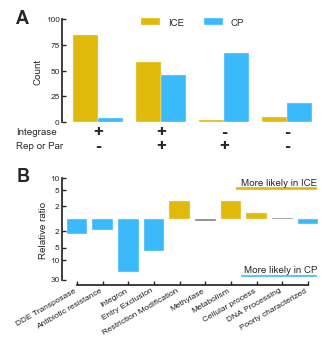

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3.307, 3.3))

fg = sns.barplot(data=crosstab_intstab, 
                    x="IPR",
                    y="Count",
                    hue="replicon_type",
                    #legend=False,
                    order=["+\n-", "+\n+", "-\n+", "-\n-"],
                    palette={"P":"#3ABAFA", "C": "#E0BA0A"},
                    #size=3.307, aspect=1,
                    saturation=1, ax=ax1)
sns.despine(trim=0, offset=3, ax=ax1, bottom=True)

ax1.set_xlabel("")
ax1.set_ylabel("Count", fontsize=7, labelpad=2)
ax1.set_xticklabels("")
ax1.set_yticks(range(0,101,25))
ax1.set_yticklabels(range(0,101,25), fontsize=6)
ax1.tick_params(axis="x", length=0, labelsize=6)
ax1.tick_params(axis='y', direction="in", pad=2, length=3)
ax1.legend(ax1.patches[3:5], ["ICE", "CP"], loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=2, fontsize=7)
table = ax1.table(cellText=[["+", "+", "-", "-"],
                            ["-", "+", "+", "-"]], 
                    rowLabels=["Integrase", "Rep or Par"],
                    bbox=[0, -0.3, 1, 0.275],
                    cellLoc='center',
                  )

table.auto_set_font_size(False)
for k, v in table.get_celld().iteritems():
    if k[1]!=-1: # if not row name
        v.set_fontsize(12)
        v.get_text().set_weight("bold")
    else:
        v.set_fontsize(7)
        
[(cell.set_linewidth(0)) for cell in table.properties()['child_artists']]


## Right plot
color = [["0.5", "#3ABAFA"],
         ["0.5", "#E0BA0A"]]
N_func = len(list_func[3:])-1
for i, r in enumerate(df_RR.loc[list_func[3:-1]].itertuples()):
    ax2.bar(i, np.log10(r.RR),color=color[r.RR>1][r.is_significant])
ax2.set_ylim(-1.5,1)

ax2.set_yticks(np.log10([1/30., 1/10., 1/5., 1/2., 2, 5, 10]))

ax2.set_xticks(np.arange(0, N_func)+0.4)
sns.despine(trim=True, offset=3, ax=ax2)
ax2.set_yticklabels(["30", "10", "5", "2", "2", "5", "10"], fontsize=6)

_ = ax2.set_xticklabels([dic_name[n] for n in list_func[3:-1]], rotation=30, va="baseline", ha="right", fontsize=6, stretch='condensed')

ax2.set_ylabel('Relative ratio', fontsize=7, labelpad=2)
ax2.tick_params(axis="y", direction="in", pad=2, length=3)
ax2.tick_params(axis="x", direction="in", pad=5, length=3)

#p_ice = ax2.axvspan(N_func, N_func+.1, ymin=0.52, facecolor='#E0BA0A')
ax2.axvspan(N_func-3.4, N_func-0.25, 0.88, 0.91, facecolor='#E0BA0A')
#p_cp = ax2.axvspan(N_func, N_func+.1, ymax=0.48, facecolor='#3ABAFA')
ax2.axvspan(N_func-3.2, N_func-0.25, 0.03, 0.05, facecolor='#3ABAFA', clip_on=False)


ax2.text(N_func-.25, .95, 'More likely in ICE', transform=ax2.get_xaxis_transform(), va="center", ha="right", fontsize=7)
ax2.text(N_func-.25, .105, 'More likely in CP', transform=ax2.get_xaxis_transform(), va="center", ha="right", fontsize=7)

ax1.annotate("A", xy=(-0.2, 1.1), xycoords="axes fraction", fontweight="bold", fontsize=13, va='top', ha="left")
ax2.annotate("B", xy=(-0.2, 1.1), xycoords="axes fraction", fontweight="bold", fontsize=13, va='top', ha="left")

plt.tight_layout(rect=[-0.01,-0.05,1,1.01], h_pad=3.5)
plt.savefig("Figures/Figure_2_Continuum_ICE_CP_RR.pdf")

# Figure 3

In [38]:
mat_GRR = df_grr.set_index(["ICE_ID_1", "ICE_ID_2"]).sort_index().GRR.unstack()
mat_GRR = mat_GRR.loc[df_conj.index, df_conj.index]
mat_GRR.fillna(mat_GRR.T, inplace=1) # get the mtric symmetric
mat_GRR.fillna(100, inplace=1) # fill diagonal with 100 (self hits)

In [39]:
df_conj.Community_noMPF_ALL.value_counts()

1    64
5    63
4    59
2    41
3    33
6    27
Name: Community_noMPF_ALL, dtype: int64

In [40]:
# Figure Heatmap
order_sort_communities = {j:i for i,j in enumerate(df_conj.Community_ALL.value_counts().sort_values(ascending=False).index)}
df_conj["community_rank_size"] = df_conj.Community_ALL.map(order_sort_communities)
df_conj.sort_values(["community_rank_size", "Class", "species"], inplace=1)
fig, ax = plt.subplots(1, 1, figsize=(3.307, 3.307/1.1))

pad, height = 0.00, 0.075
margin = 0.01


# Heatmap
size_community = df_conj.groupby("Community_ALL").replicon_type_2.size()
m = ax.matshow(mat_GRR.loc[df_conj.index, df_conj.index], cmap=plt.cm.viridis, aspect='auto', interpolation='nearest')
cbar = plt.colorbar(m, ax=ax, fraction=0.1, pad=0.02)
cbar.set_ticks(range(0, 101, 20))
cbar.ax.yaxis.set_tick_params(pad=0, length=2, labelsize=8)
cbar.set_label("wGRR", fontsize=9, labelpad=0)

sns.despine(ax=ax, bottom=True, left=True)
ax.set_xticklabels("")
ax.set_yticklabels("")
ax.tick_params(length=0)



fig.subplots_adjust(right=1-height-0.02, 
                    left=height  + 0.08, # for label 
                    top=1-height - 0.01 - margin, 
                    bottom=height+ 0.00 + margin,
                    wspace=0.2)

# Color bar on top

ratio_types = (df_conj.groupby("Community_ALL").replicon_type_2.value_counts(normalize=True).unstack()
               .loc[size_community.sort_values(ascending=False).sort_values(ascending=False).index])
ratio_types.fillna(0, inplace=1)
box = ax.get_position()
cax = fig.add_axes([box.xmin, box.ymax+pad, box.width, height], zorder=10)
cax.set_xticklabels("")
cax.set_yticks([0.9])
cax.set_yticklabels(["90%"], fontsize=9)
cax.tick_params(length=2, pad=.5, axis="y")
cax.tick_params(length=0, axis="x")
cax.text(-0.01, 0.6, "CP", color=dic_replicon_color["P"], rotation=0, va="bottom", ha="right", transform=cax.transAxes, fontsize=8, fontweight="bold")
cax.text(-0.01, 0.4, "ICE", color=dic_replicon_color["C"], rotation=0, va="top", ha="right", transform=cax.transAxes, fontsize=8, fontweight="bold")
cax.hlines(0.55, -0.1, -0.01, transform=cax.transAxes, clip_on=False, lw=1)

prev = 0
for i, rt in enumerate(ratio_types.itertuples()):
    cax.bar(prev, rt.ICE, size_community[rt.Index], color=dic_replicon_color["C"], lw=0, edgecolor=dic_replicon_color["C"])
    cax.bar(prev, rt.CP, size_community[rt.Index], bottom=rt.ICE, color=dic_replicon_color["P"], lw=0, edgecolor=dic_replicon_color["P"])
    prev += size_community[rt.Index]
    if i < len(size_community)-1:
        cax.vlines(prev, *cax.get_ylim(), lw=0.5, color="0.15")
cax.hlines(0.9, *cax.get_xlim(), linestyle="--", lw=0.5)
cax.set_xlim(ax.get_xlim())
cax.set_ylim(0, 1)
# prev = 0
# for rt in df_conj.reset_index().replicon_type.iteritems():
#     cax.bar(prev, 1, 1, color=dic_replicon_color[rt[1]], lw=2, edgecolor=dic_replicon_color[rt[1]])
#     prev += 1
# cax.set_xlim(ax.get_xlim())
cax.yaxis.set_label_position("right")
sns.despine(ax=cax, bottom=True, left=True, right=False, trim=True)

#color bar on bottom
cax_bot = fig.add_axes([box.xmin, box.ymin-pad-height, box.width, height], zorder=10)
cax_bot.set_xticklabels("")

cax_bot.set_yticks([0.25, 0.75])
cax_bot.set_yticklabels(["Class", "Species"], fontsize=8)
cax_bot.tick_params(length=1, pad=1, direction="out", axis="y")
cax_bot.tick_params(axis="x", length=0)
#cax_bot.set_ylabel("Species\nGenus", rotation=0, va="top", ha="right", labelpad=0, fontsize=8.5)

prv_com = None
for i, rt in enumerate(df_conj.reset_index().itertuples()):
    cax_bot.bar(i, 0.5, 1, color=rt.color_class, lw=0.1, edgecolor=rt.color_class)
    cax_bot.bar(i, 0.5, 1, bottom=0.5, color=rt.color_species, lw=0.1, edgecolor=rt.color_species)
    if rt.Community_ALL != prv_com:
        cax_bot.vlines(i, 0,1, lw=0.5, color="0.15", zorder=20)
        prv_com = rt.Community_ALL
        
cax_bot.set_xlim(ax.get_xlim())
cax_bot.set_ylim(0,1)
sns.despine(ax=cax_bot, bottom=True, left=True)


# color bar left
cax2 = fig.add_axes([box.xmin-pad-height, box.ymin, height, box.height])
cax2.set_xticklabels("")
cax2.set_yticklabels("")
cax2.tick_params(length=0)
cax2.set_ylabel("Louvain's groups", labelpad=-5, fontsize=9)
prev = 0
for com in df_conj.Community_ALL.value_counts().sort_values(ascending=False).iteritems():
    cax2.barh(prev, 1, com[1], color=dic_community_color_all[com[0]], lw=0.2, edgecolor=dic_community_color_all[com[0]] )
    cax2.text(0.5, prev+(com[1])/2., str(com[0]), color="white", fontweight="bold", ha="center", va="center")
    prev += com[1]
    cax2.hlines(prev, 0, 1, lw=0.5, color="0.15")
    
cax2.set_ylim(ax.get_ylim())
sns.despine(ax=cax2, bottom=True, left=True)

# ax_net.text(0.05, 1.05, "A",transform=ax_net.transAxes, fontsize=15, fontweight="bold")
# ax_net.text(1., 1.05, "B",transform=ax_net.transAxes, fontsize=15, fontweight="bold")
#plt.tight_layout()
plt.savefig("Figures/Figure_3_Community_heatmap_Louvain.pdf")
plt.savefig("Figures/Figure_3_Community_heatmap_Louvain.png", dpi=1000)

## Supp mat: no MPF

In [41]:
df_nompf_grr_all = pd.read_table("Tables/Table_4_Table_GRR_full_noMPF.txt", index_col=0)

In [42]:
df_nompf_grr_all.head()

ICE_ID_1                      ICE_ID_2        GRR
0  BUAM001.B.00002.P004_typeT_1  BUAM001.B.00001.P004_typeT_1   3.666111
1  BUAM001.B.00002.P004_typeT_1  BUAM001.B.00003.P004_typeT_1  94.444444
2  BUAM001.B.00002.P004_typeT_1  BUCE001.B.00003.C001_typeT_1   0.900000
3  BUAM001.B.00002.P004_typeT_1  BUCE001.B.00006.C001_typeT_1   0.803056
4  BUAM001.B.00002.P004_typeT_1  BUCE002.B.00006.C002_typeT_1   0.832222

In [43]:
mat_GRR_noMPF = df_nompf_grr_all.set_index(["ICE_ID_1", "ICE_ID_2"]).sort_index().GRR.unstack()
mat_GRR_noMPF = mat_GRR_noMPF.loc[df_conj.index, df_conj.index]
mat_GRR_noMPF.fillna(mat_GRR_noMPF.T, inplace=1) # get the matrix symmetric
mat_GRR_noMPF.fillna(0, inplace=1) # fill diagonal with 0 (GRR have been filtered above 5%, so bad hist form separate cluster)

In [44]:
size_community

Community_ALL
1    67
2    64
3    32
4    45
5    62
6    17
dtype: int64

In [45]:
df_conj.head()

ATB_res  CELLULAR PROCESSES AND SIGNALING  \
ICE_ID                                                                    
BUPS002.B.00034.P004_typeT_1      0.0                              15.0   
RASO001.B.00005.P003_typeT_1      0.0                              14.0   
ENAS001.B.00003.P004_typeT_1      0.0                              19.0   
ENCL003.B.00001.P003_typeT_1      6.0                              21.0   
ENCL004.B.00008.P004_typeT_1      0.0                              12.0   

                              DDE_Transposase  Eex  \
ICE_ID                                               
BUPS002.B.00034.P004_typeT_1              1.0  1.0   
RASO001.B.00005.P003_typeT_1              2.0  0.0   
ENAS001.B.00003.P004_typeT_1              5.0  1.0   
ENCL003.B.00001.P003_typeT_1             13.0  1.0   
ENCL004.B.00008.P004_typeT_1              4.0  1.0   

                              INFORMATION STORAGE AND PROCESSING  Integrase  \
ICE_ID                                                                        
BUPS002.B.00034.P004_typeT_1                                 7.0        0.0   
RASO001.B.00005.P003_typeT_1                                12.0        1.0   
ENAS001.B.00003.P004_typeT_1                                15.0        1.0   
ENCL003.B.00001.P003_typeT_1                                32.0        3.0   
ENCL004.B.00008.P004_typeT_1                                11.0        0.0   

                              METABOLISM  MOB   MPF  N_prot  \
ICE_ID                                                        
BUPS002.B.00034.P004_typeT_1         0.0  1.0   8.0    56.0   
RASO001.B.00005.P003_typeT_1         3.0  1.0   7.0    90.0   
ENAS001.B.00003.P004_typeT_1         4.0  1.0   6.0    74.0   
ENCL003.B.00001.P003_typeT_1         0.0  2.0  11.0   111.0   
ENCL004.B.00008.P004_typeT_1         1.0  1.0   6.0    52.0   

                                     ...           Tandem.dir  N_repeats_norm  \
ICE_ID                               ...                                        
BUPS002.B.00034.P004_typeT_1         ...                  0.0        0.000403   
RASO001.B.00005.P003_typeT_1         ...                  0.0        0.000017   
ENAS001.B.00003.P004_typeT_1         ...                  0.0        0.000154   
ENCL003.B.00001.P003_typeT_1         ...                  0.0        0.000082   
ENCL004.B.00008.P004_typeT_1         ...                  0.0        0.000117   

                              replicon_type_2  color_type  species_ID  \
ICE_ID                                                                  
BUPS002.B.00034.P004_typeT_1               CP     #3ABAFA           6   
RASO001.B.00005.P003_typeT_1               CP     #3ABAFA          34   
ENAS001.B.00003.P004_typeT_1               CP     #3ABAFA          14   
ENCL003.B.00001.P003_typeT_1               CP     #3ABAFA          14   
ENCL004.B.00008.P004_typeT_1               CP     #3ABAFA          15   

                              color_species         genus  color_genus  \
ICE_ID                                                                   
BUPS002.B.00034.P004_typeT_1        #d45f09  Burkholderia      #8dd525   
RASO001.B.00005.P003_typeT_1        #a8781b     Ralstonia      #6d478b   
ENAS001.B.00003.P004_typeT_1        #a750a0  Enterobacter      #1f9ea2   
ENCL003.B.00001.P003_typeT_1        #a750a0  Enterobacter      #1f9ea2   
ENCL004.B.00008.P004_typeT_1        #bd4298  Enterobacter      #1f9ea2   

                              color_class  community_rank_size  
ICE_ID                                                          
BUPS002.B.00034.P004_typeT_1      #75cb4d                    0  
RASO001.B.00005.P003_typeT_1      #75cb4d                    0  
ENAS001.B.00003.P004_typeT_1      #fb4f52                    0  
ENCL003.B.00001.P003_typeT_1      #fb4f52                    0  
ENCL004.B.00008.P004_typeT_1      #fb4f52                    0  

[5 rows x 57 columns]

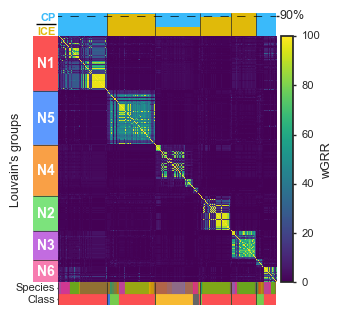

In [46]:
# Figure Heatmap
order_sort_communities_noMPF_ALL = {j:i for i,j in enumerate(df_conj.Community_noMPF_ALL.value_counts().sort_values(ascending=False).index)}
df_conj["community_rank_size_noMPF_ALL"] = df_conj.Community_noMPF_ALL.map(order_sort_communities_noMPF_ALL)
df_conj.sort_values(["community_rank_size_noMPF_ALL", "Class", "species"], inplace=1)

fig, ax = plt.subplots(1, 1, figsize=(3.307, 3.307/1.1))



# Heatmap
size_community = df_conj.groupby("Community_noMPF_ALL").replicon_type_2.size()

m = ax.matshow(mat_GRR_noMPF.loc[df_conj.index, df_conj.index], cmap=plt.cm.viridis, aspect='auto')
cbar = plt.colorbar(m, ax=ax, fraction=0.1, pad=0.02)
cbar.set_ticks(range(0, 101, 20))
cbar.ax.yaxis.set_tick_params(pad=0, length=2, labelsize=8)
cbar.set_label("wGRR", fontsize=9, labelpad=0)

sns.despine(ax=ax, bottom=True, left=True)
ax.set_xticklabels("")
ax.set_yticklabels("")
ax.tick_params(length=0)


pad, height = 0.00, 0.075
margin = 0.01

fig.subplots_adjust(right=1-height-0.02, 
                    left=height  + 0.08, # for label 
                    top=1-height - 0.01 - margin, 
                    bottom=height+ 0.00 + margin,
                    wspace=0.2)

# Color bar on top

ratio_types = (df_conj.groupby("Community_noMPF_ALL").replicon_type_2.value_counts(normalize=True).unstack()
               .loc[size_community.sort_values(ascending=False).sort_values(ascending=False).index])
ratio_types.fillna(0, inplace=1)
box = ax.get_position()
cax = fig.add_axes([box.xmin, box.ymax+pad, box.width, height], zorder=10)
cax.set_xticklabels("")
cax.set_yticks([0.9])
cax.set_yticklabels(["90%"], fontsize=9)
cax.tick_params(length=2, pad=.5, axis="y")
cax.tick_params(length=0, axis="x")
cax.text(-0.01, 0.6, "CP", color=dic_replicon_color["P"], rotation=0, va="bottom", ha="right", transform=cax.transAxes, fontsize=8, fontweight="bold")
cax.text(-0.01, 0.4, "ICE", color=dic_replicon_color["C"], rotation=0, va="top", ha="right", transform=cax.transAxes, fontsize=8, fontweight="bold")
cax.hlines(0.55, -0.1, -0.01, transform=cax.transAxes, clip_on=False, lw=1)

prev = 0
for i, rt in enumerate(ratio_types.itertuples()):
    cax.bar(prev, rt.ICE, size_community[rt.Index], color=dic_replicon_color["C"], lw=0, edgecolor=dic_replicon_color["C"])
    cax.bar(prev, rt.CP, size_community[rt.Index], bottom=rt.ICE, color=dic_replicon_color["P"], lw=0, edgecolor=dic_replicon_color["P"])
    prev += size_community[rt.Index]
    if i < len(size_community)-1:
        cax.vlines(prev, *cax.get_ylim(), lw=0.5, color="0.15")
cax.hlines(0.9, *cax.get_xlim(), linestyle="--", lw=0.5)
cax.set_xlim(ax.get_xlim())
cax.set_ylim(0, 1)

cax.yaxis.set_label_position("right")
sns.despine(ax=cax, bottom=True, left=True, right=False, trim=True)

#color bar on bottom
cax_bot = fig.add_axes([box.xmin, box.ymin-pad-height, box.width, height], zorder=10)
cax_bot.set_xticklabels("")

cax_bot.set_yticks([0.25, 0.75])
cax_bot.set_yticklabels(["Class", "Species"], fontsize=8)
cax_bot.tick_params(length=1, pad=1, direction="out", axis="y")
cax_bot.tick_params(axis="x", length=0)
#cax_bot.set_ylabel("Species\nGenus", rotation=0, va="top", ha="right", labelpad=0, fontsize=8.5)
prev = 0
prv_com = None
for i, rt in enumerate(df_conj.reset_index().itertuples()):
    cax_bot.bar(prev, 0.5, 1, color=rt.color_class, lw=0.1, edgecolor=rt.color_class)
    cax_bot.bar(prev, 0.5, 1, bottom=0.5, color=rt.color_species, lw=0.1, edgecolor=rt.color_species)
    prev += 1
    if rt.Community_noMPF_ALL != prv_com:
        cax_bot.vlines(i, 0,1, lw=0.5, color="0.15", zorder=20)
        prv_com = rt.Community_noMPF_ALL
        
cax_bot.set_xlim(ax.get_xlim())
cax_bot.set_ylim(0,1)
sns.despine(ax=cax_bot, bottom=True, left=True)


# color bar left
cax2 = fig.add_axes([box.xmin-pad-height, box.ymin, height, box.height])
cax2.set_xticklabels("")
cax2.set_yticklabels("")
cax2.tick_params(length=0)
cax2.set_ylabel("Louvain's groups", labelpad=-5, fontsize=9)
prev = 0
for com in df_conj.Community_noMPF_ALL.value_counts().sort_values(ascending=False).iteritems():
    cax2.barh(prev, 1, com[1], color=dic_community_color_noMPF_ALL[com[0]], lw=0.2, edgecolor=dic_community_color_noMPF_ALL[com[0]] )
    cax2.text(0.5, prev+(com[1])/2., "N"+str(com[0]), color="white", fontweight="bold", ha="center", va="center")
    prev += com[1]
    cax2.hlines(prev, 0, 1, lw=0.5, color="0.15")
    
cax2.set_ylim(ax.get_ylim())
sns.despine(ax=cax2, bottom=True, left=True)

# ax_net.text(0.05, 1.05, "A",transform=ax_net.transAxes, fontsize=15, fontweight="bold")
# ax_net.text(1., 1.05, "B",transform=ax_net.transAxes, fontsize=15, fontweight="bold")
#plt.tight_layout()
plt.savefig("Figures/suppFigure_3_Community_heatmap_Louvain_noMPF.pdf")
plt.savefig("Figures/suppFigure_3_Community_heatmap_Louvain_noMPF.png", dpi=1000)

In [47]:
df_conj.Class.value_counts(normalize=True)

Gammaproteobacteria      0.693380
Epsilonproteobacteria    0.170732
Betaproteobacteria       0.090592
Fusobacteriales          0.027875
Alphaproteobacteria      0.013937
Acidobacteriales         0.003484
Name: Class, dtype: float64

# Figure 4

In [48]:
df_conj["Int_par_or_rep"] = df_conj.astype(bool).apply(lambda x: "{}_{}".format(x["Integrase"], x["Partition_System"] or x["Replication"]), axis=1)

df_conj["Int_par_or_rep2"] = df_conj.Int_par_or_rep.map({"True_True":"11_All", "False_False":"00_Nothing", "True_False":"10_Integrase", "False_True":"01_Stabilization"})

df_stab_int_ct = pd.crosstab([df_conj.Int_par_or_rep2, df_conj.replicon_type], df_conj.Community_ALL)

In [49]:
df_stab_int_ct

Community_ALL                    1   2   3   4   5  6
Int_par_or_rep2  replicon_type                       
00_Nothing       C               0   0   3   2   0  0
                 P               1   0   0  13   0  5
01_Stabilization C               0   0   0   0   2  0
                 P              38  10   0  10   1  8
10_Integrase     C               0  41  29  15   0  0
                 P               0   1   0   2   0  1
11_All           C               0   0   0   3  56  0
                 P              28  12   0   0   3  3

In [50]:
with plt.rc_context(sns.set(font_scale=0.7, style="ticks")):
    fig, ax = plt.subplots(1, 1, figsize=(3.42, 2.2))
    mosaic_plot(df_stab_int_ct.sort_index(ascending=[True, False]),
                dic_color_row=dic_int_stab2,
                row_labels=["Nothing", "Partition\nor Replication", "Integration", "All"],
                alpha_label=["CP", "ICE"],
                y_label="",
                top_label=False,
                pad=0.02,
               order=range(1,7), 
               color_ylabel=True,
               ax=ax)
    ax.tick_params(axis="x", pad=0.1, length=2)
    plt.xlabel("Louvain's groups", labelpad=0)
    plt.tight_layout(rect=[0,0,0.9,1])
    plt.savefig("Figures/Figure_4_Mosaic_Communities_Function.pdf")

## Supp mat

In [51]:
ct_int_par_rep_noMPF_ALL = pd.crosstab([df_conj.replicon_type, df_conj.Integrase.astype(bool),
                             df_conj.Partition_System.astype(bool) | df_conj.Replication.astype(bool)],
                             [df_conj.Community_noMPF_ALL]).sort_index(ascending=[True, False, True]).reset_index()

ct_int_par_rep_noMPF_ALL["Int_rep_par"] = ct_int_par_rep_noMPF_ALL.apply(lambda x: "{}_{}".format(x["Integrase"], x["row_2"]), axis=1)

ct_int_par_rep_noMPF_melt_ALL = pd.melt(ct_int_par_rep_noMPF_ALL, id_vars=["replicon_type", "Integrase", "row_2", "Int_rep_par"])

ct_int_par_rep_noMPF_ALL["Int_par_or_rep2"] = ct_int_par_rep_noMPF_ALL.Int_rep_par.map({"True_True":"11_All", "False_False":"00_Nothing", "True_False":"10_Integrase", "False_True":"01_Stabilization"})


ct_int_par_rep_noMPF2_ALL = ct_int_par_rep_noMPF_ALL.set_index(["Int_par_or_rep2", "replicon_type"]).select_dtypes([int])

In [52]:
#
fig = plt.figure(figsize=(6,5))
ax1 = plt.subplot2grid((2,1), (0, 0))
ax2 = plt.subplot2grid((2,1), (1, 0))

CT_noMPF_ALL_ALL = df_conj.groupby(["Community_noMPF_ALL"]).Community_ALL.value_counts(normalize=True).unstack()
CT_noMPF_ALL_ALL.plot(kind="bar", 
                      stacked=True, 
                      color=dic_community_color_all.values(),
                      legend=False,
                      ax=ax1)

ax1.legend(loc="center left", bbox_to_anchor=[1, 0.5], title="Louvain's\ngroups")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.set_xlabel("")
ax1.set_ylabel("Frequency")
ax1.tick_params(top=False, right=False)

mosaic_plot(ct_int_par_rep_noMPF2_ALL.sort_index(ascending=[True, False]),
            dic_int_stab2,
            ax=ax2,
           row_labels=["Nothing", "Partition\nor Replication", "Integration", "All"],
           y_label="",
           top_label="Size of groups",
           alpha_label=["CP", "ICE"],
           order="Normal",
           x_label="Louvain's groups without MPF genes",
           color_ylabel=True)

ax1.tick_params(pad=1)
ax2.tick_params(pad=1, right="off")
ax2.set_xticklabels(["N"+str(i) for i in range(1,7)])
ax1.set_xticklabels(["N"+str(i) for i in range(1,7)])
plt.tight_layout(rect=[0,0,.9,1])
plt.savefig("Figures/supp_stack_barplot_Communities_Communities_noMPF.pdf")

# Figure 5 

In [53]:
df_bbh_grr = df_bbh.merge(df_grr, on=["ICE_ID_1", "ICE_ID_2"])

In [54]:
df_bbh_grr.groupby("RepType_comparison").apply(spearman, "GRR", "perId")

Rho  p-value
RepType_comparison                   
CP-CP               0.833618      0.0
ICE-CP              0.660781      0.0
ICE-ICE             0.906369      0.0

In [55]:

fig = plt.figure(figsize=(3.307,3.307))
ax  = plt.subplot2grid((2,2), (0,0))
ax1 = plt.subplot2grid((2,2), (0,1))
ax2 = plt.subplot2grid((2,2), (1,0))
ax3 = plt.subplot2grid((2,2), (1,1))

bins_grr_bbh = np.linspace(0, 100, 100)

c, p = histplot_2D(df_bbh_grr, ax, bins_grr_bbh)
ax.hlines(30, 78, 101, zorder=10, lw=0.9, color="#01aae8")
ax.hlines( 0, 79.5, 101, zorder=10, lw=0.9, color="#01aae8")
ax.vlines( 80, -2,  30, zorder=10, clip_on=False, lw=0.9, color="#01aae8")
ax.vlines(101, 0,  30, zorder=10, lw=0.9, color="#01aae8")
ax.text(77.5, 30, "30", ha="right", va="center", fontsize=7.5, color="0.2")
ax.text(80, -2.5, "80", ha="center", va="top", fontsize=7.5, color="0.2")
#sns.despine(trim=True, ax=ax)
ax.set_xlim(0,102)
ax.set_ylim(-1,100)

histplot_2D(df_bbh_grr[(df_bbh_grr.RepType_comparison=="ICE-ICE") & (df_bbh_grr.GRR<30) & (df_bbh_grr.perId>80)], ax1, bins_grr_bbh)
histplot_2D(df_bbh_grr[(df_bbh_grr.RepType_comparison=="CP-CP") & (df_bbh_grr.GRR<30) & (df_bbh_grr.perId>80)], ax3, bins_grr_bbh)
histplot_2D(df_bbh_grr[(df_bbh_grr.RepType_comparison=="ICE-CP") & (df_bbh_grr.GRR<30) & (df_bbh_grr.perId>80)], ax2, bins_grr_bbh)
for a in [ax1, ax2, ax3]:
    plt.setp(a.spines.values(), color="#01aae8")

ax1.set_xlim(79.5,100.5)
ax2.set_xlim(79.5,100.5)
ax3.set_xlim(79.5,100.5)

ax1.set_ylim(-0.5,30.5)
ax2.set_ylim(-0.5,30.5)
ax3.set_ylim(-0.5,30.5)

for i,a in enumerate([ax, ax1, ax2, ax3]):
    a.tick_params(pad=1, direction="in", length=2, top=False, right=False, zorder=10, labelsize="small")
    a.plot((80,100), (0,30), ls="--", color="#01aae8", lw=0.9)
    a.annotate("ABCD"[i], xy=(0.05,0.95), xycoords="axes fraction", fontweight="bold", fontsize=14, va='top')

#ax.set_ylabel("wGRR (%)", labelpad=0.5)
ax.annotate("wGRR (%)", (0.03,0.45), xycoords="figure fraction", ha="center", va="center", rotation=90)

#ax.set_xlabel("Protein Identity (%)")
ax.set_xlabel("")

ax1.text(1, 0.5, "ICE-ICE", rotation=270, ha="left", va="center", transform=ax1.transAxes)
ax3.text(1, 0.5, "CP-CP", rotation=270, ha="left", va="center", transform=ax3.transAxes)
ax2.text(0, 0.5, "ICE-CP", rotation=90, ha="right", va="center", transform=ax2.transAxes)

for a in [ax1, ax3]:
    a.set_yticks([0,15,30])
    a.set_yticklabels([0,"", 30])
    a.yaxis.set_label_position("right")
    a.yaxis.set_ticks_position("right")
ax2.set_yticks([0,30])
ax.set_xticks([0,50,100])
ax1.set_xticks([80,90,100])
ax2.set_xticks([80,90,100])
ax3.set_xticks([80,90,100])
ax3.annotate("Protein Identity (%)", (0.5,0), xycoords="figure fraction", ha="center", va="bottom")

plt.tight_layout()    
fig.subplots_adjust(top=0.83, hspace=0.1, wspace=0.1)
box = ax.get_position()
box1 = ax1.get_position()
pad, height = 0.03, 0.03
cax = fig.add_axes([box.xmin, box.ymax+pad, box1.xmax-box.xmin, height])
cb = plt.colorbar(p, cax=cax, orientation="horizontal")
cax.xaxis.tick_top()
cax.set_xlabel("Count")
cax.xaxis.set_label_position("top")
cax.tick_params(pad=-5, labelsize="small", length=2, direction="out", zorder=10)

plt.savefig("Figures/Figure_5_Prot_ID_GRR_distri_2.pdf")

# Figure 6

In [56]:
# Null hypothesis for ICE-CP comparisons
H0 = binom_test_maha(df_grr.dropna(subset=["Mah_P_inf_ice"]))

In [57]:
# Bins for ICE-ICE and CP-CP comparisons
bins = 36
xbins = np.linspace(0,100, bins)
ybins = np.array([0]+list(np.logspace(-5, 1, bins-1)))

# Bins for ICE-CP comparison
bins_CP = 15 # multiple of 7 + 1 to have square in log-log scale
xbins_CP = np.linspace(0, 100, bins_CP)
ybins_CP = np.array([0]+list(np.logspace(-5, 1, bins_CP-1)))

In [58]:
# Compute test for each bin for ICE-CP comparison
df_grr["GRR_cat"] = pd.cut(df_grr.GRR, xbins_CP, labels=xbins_CP[:-1])
df_grr["dist_phylo_cat"] = pd.cut(df_grr.dist_phylo, ybins_CP, labels=ybins_CP[:-1])

tmp = df_grr.dropna(subset=["dist_phylo", "Mah_P_inf_ice"]).groupby(["dist_phylo_cat", "GRR_cat"]).agg({"Mah_P_inf_ice":{"Mean_p": np.mean,
                                                                                                                    "P_binomial":lambda x: binom_test_maha(x, H0)}})
tmp.columns = tmp.columns.droplevel()
# significant if pval < 0.01 
# Final value is H0 when not significant for representation purpose (so it's grey).
tmp["final_val"] = [i.Mean_p if i.P_binomial<1e-2 else H0 for i in tmp.itertuples()] 
P = (pd.DataFrame(index=ybins_CP[:-1], columns=xbins_CP[:-1]).stack(dropna=0).reset_index().drop(0, axis=1)
      .merge(tmp.reset_index(), left_on=["level_0", "level_1"], right_on=["dist_phylo_cat", "GRR_cat"], how="outer")).set_index(["level_0", "level_1"]).final_val.unstack()
# Mask array of the final values
ma = np.ma.array(P.values, mask=np.isnan(P.values))

# #No MPF
# df_nompf_grr_dp2["GRR_cat"] = pd.cut(df_nompf_grr_dp2.GRR, xbins_CP, labels=xbins_CP[:-1])
# df_nompf_grr_dp2["dist_phylo_cat"] = pd.cut(df_nompf_grr_dp2.dist_phylo, ybins_CP, labels=ybins_CP[:-1])

# tmp = df_nompf_grr_dp2.dropna(subset=["dist_phylo", "Mah_P_inf_ice"]).groupby(["dist_phylo_cat", "GRR_cat"]).agg({"Mah_P_inf_ice":{"Mean_p": np.mean,
#                                                                                                                     "P_binomial":lambda x: binom_test_maha(x, H0)}})
# tmp.columns = tmp.columns.droplevel()
# tmp["final_val"] = [i.Mean_p if i.P_binomial<1e-2 else H0 for i in tmp.itertuples()]
# P = (pd.DataFrame(index=ybins_CP[:-1], columns=xbins_CP[:-1]).stack(dropna=0).reset_index().drop(0, axis=1)
#       .merge(tmp.reset_index(), left_on=["level_0", "level_1"], right_on=["dist_phylo_cat", "GRR_cat"], how="outer")).set_index(["level_0", "level_1"]).final_val.unstack()
# ma_noMPF = np.ma.array(P.values, mask=np.isnan(P.values))

In [59]:
# Figure Final with MPF
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7.08, 2.5), sharex=True, sharey=True)

axs = [ax1, ax3, ax2]

for g, ax in zip(df_grr.groupby("RepType_comparison", sort=False), axs):
    if g[0]!="ICE-CP":

        counts, _, _ = np.histogram2d(g[1].dropna(subset=["dist_phylo"]).GRR,
                                      g[1].dropna(subset=["dist_phylo"]).dist_phylo,
                                      bins=(xbins, ybins))
        p = ax.pcolormesh(xbins, ybins, counts.T,
                           vmax=1e4,
                           vmin=1e0,
                           cmap=plt.cm.inferno_r,
                           norm=plt.matplotlib.colors.LogNorm())
    else:
        p2 = ax.pcolormesh(xbins_CP, ybins_CP, ma,
                           vmax=H0+0.5,
                           vmin=H0-0.5,
                           cmap=plt.cm.coolwarm,)
                           #)norm=plt.matplotlib.colors.BoundaryNorm(bounds, cmap.N))

    ax.set_yscale("log")
    ax.set_ylim(6e-6,8)
    ax.set_xlim(-5,105)
    ax.set_xlabel("wGRR ({})".format(g[0]), fontsize=9)

    ax.tick_params(direction="in", which="both", pad=4)

ax1.set_ylabel("Phylogenetic distance (subst/aa)")
# Add rectangle
rect1 = plt.matplotlib.patches.Rectangle( (20, 0.1), 80, 4, linewidth=1, edgecolor='k', facecolor='none')
rect2 = plt.matplotlib.patches.Rectangle( (20, 0.1), 80, 4, linewidth=1, edgecolor='k', facecolor='none')
rect3 = plt.matplotlib.patches.Rectangle( (20, 0.1), 80, 4, linewidth=1, edgecolor='k', facecolor='none')

ax1.add_patch(rect1)
ax2.add_patch(rect2)
ax3.add_patch(rect3)

ax1.annotate("A", xy=(-0.15,1), xycoords="axes fraction", fontweight="bold", fontsize=14, va='top', ha="left")
ax3.annotate("B", xy=(-0.15, 1), xycoords="axes fraction", fontweight="bold", fontsize=14, va='top', ha="left")

plt.tight_layout()

fig.subplots_adjust(right  = 0.8,
                    #top    = 0.85,
                    bottom = 0.18,
                    wspace=0.0,)

box3 = ax3.get_position()
shift = 0.09
ax3.set_position([box3.xmin+shift, box3.ymin, box3.width, box3.height] )

box3 = ax3.get_position()
box1 = ax1.get_position()
box2 = ax2.get_position()
pad, width, height = 0.01, 0.01, 0.02
# cax = fig.add_axes([box1.xmin, box1.ymax+pad, box2.xmax - box1.xmin, height]) 
cax = fig.add_axes([box2.xmax+pad, box2.ymin, width, box2.height]) 
cb = plt.colorbar(p, cax=cax, orientation="vertical")
cb.ax.yaxis.set_ticks(np.linspace(0,1,5 ))
cb.ax.yaxis.set_ticklabels([r"$\mathdefault{{10^{{{}}}}}$".format(i) for i in range(0,5,1)], fontsize=8)
cb.ax.yaxis.set_tick_params(pad=0,length=2)
cb.ax.set_xlabel("Count", fontsize=9, labelpad=10)
cb.ax.yaxis.tick_right()
cb.ax.yaxis.set_label_position("right")

#cax2 = fig.add_axes([box3.xmin, box3.ymax+pad, box3.width, height])
cax2 = fig.add_axes([box3.xmax+pad, box3.ymin, width, box3.height])

cb2 = plt.colorbar(p2, cax=cax2, orientation="vertical")
cb2.ax.yaxis.set_ticks([0.1, 0.5, 0.9])
cb2.ax.yaxis.set_ticklabels(["Less than\nexpected", "Not\nSignificant", "More than\nexpected"],
                            fontsize=7.5,
                            ha="left", 
                            va="center") # p-value ICE smaller/bigger than CP
cb2.set_label("Proportion of ICEs more distant than CPs", fontsize=8, labelpad=3)
cb2.ax.yaxis.set_tick_params(pad=1, length=0)
cb2.ax.yaxis.set_label_position("right")
cb2.ax.yaxis.set_ticks_position("right")


plt.savefig("Figures/Figure_6_GRR_dist_phylo_ICE_CP_typeT_maha.pdf")

## Binomial test on the rectangle zone

In [60]:
df_grr.Mah_P_inf_ice.mean()

0.19239384495520062

In [61]:
rect = df_grr.dropna(subset=['dist_phylo']).query("(GRR>20) & (dist_phylo>0.1) & (RepType_comparison=='ICE-CP')") # Don't have phylogenetic distance outside proteo
no_rect = df_grr.dropna(subset=['dist_phylo']).query("((GRR<=20) | (dist_phylo<=0.1) )& (RepType_comparison=='ICE-CP')")

In [62]:
print """The proportion of ICE more distant to their host in: 
- outside the rectangle: {}, pval = {},
- in the entire dataset: {} (H0)
- inside the rectangle: {}, pval = {}""".format(binom_test_maha(no_rect), binom_test_maha(no_rect, H0), H0, binom_test_maha(rect), binom_test_maha(rect, H0))

The proportion of ICE more distant to their host in: 
- outside the rectangle: 0.182508112635, pval = 0.000504692337583,
- in the entire dataset: 0.192393844955 (H0)
- inside the rectangle: 0.234636871508, pval = 0.15500907102


In [63]:
 binom_test_maha(no_rect, binom_test_maha(rect))

1.8462972518313682e-68

In [64]:
rect.groupby(["GRR_cat", "dist_phylo_cat"]).Mah_P_inf_ice.mean().describe()

count    19.000000
mean      0.315990
std       0.392139
min       0.000000
25%       0.000000
50%       0.086957
75%       0.657143
max       1.000000
Name: Mah_P_inf_ice, dtype: float64

In [65]:
no_rect.groupby(["GRR_cat", "dist_phylo_cat"]).Mah_P_inf_ice.mean().describe()

count    47.000000
mean      0.267248
std       0.301059
min       0.000000
25%       0.000000
50%       0.165084
75%       0.400000
max       1.000000
Name: Mah_P_inf_ice, dtype: float64

In [66]:
ss.ranksums(rect.dropna(subset=["Mah_P_inf_ice"]).groupby(["GRR_cat", "dist_phylo_cat"]).Mah_P_inf_ice.mean().values,
            no_rect.dropna(subset=["Mah_P_inf_ice"]).groupby(["GRR_cat", "dist_phylo_cat"]).Mah_P_inf_ice.mean().values,)

(-0.049567331233219797, 0.96046718051588931)

In [67]:
diff_rect = rect.apply(lambda x: x["Mahalanobis_Pval_1"] - x["Mahalanobis_Pval_2"] if x["replicon_type_1"=="C"] else x["Mahalanobis_Pval_2"] - x["Mahalanobis_Pval_1"], axis=1) 

In [68]:
diff_norect = no_rect.apply(lambda x: x["Mahalanobis_Pval_1"] - x["Mahalanobis_Pval_2"] if x["replicon_type_1"=="C"] else x["Mahalanobis_Pval_2"] - x["Mahalanobis_Pval_1"], axis=1)

In [69]:
ss.ranksums(diff_rect, diff_norect)

(-9.5210335296102535, 1.7146515630899331e-21)

In [70]:
sns.set(font_scale=1, style="ticks")
plt.figure(figsize=(3.7,3.7))
plt.violinplot([diff_norect.values, diff_rect.values], showmedians=True,showextrema=False)
_  = plt.xticks([1,2], ["outside\nrectangle", "inside\nrectangle"])
plt.ylabel(r"$\mathdefault{pvalue_{ICE} - pvalue_{CP}}$")
plt.tight_layout()
plt.savefig("Figures/supp_FigureS7_Distance_distri_rectangle.pdf")